In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import datetime as dt

In [31]:
class cluster_K_means:
    def fit(self, df, k):
        
        self.centroids = {}
        
        #First k elements will be centroid
        for i in range(k):
            self.centroids[i] = df[i]
            
        #iterations
        for i in range(500):
            self.groups = {}
            for i in range(k):
                self.groups[i] = []

            for features in df:
                distances = self.euclidian_dist(features)
                minDis = min(distances)
                classification = distances.index(minDis)
                self.groups[classification].append(features)

            previous = dict(self.centroids)

            for classification in self.groups:
                self.centroids[classification] = np.average(self.groups[classification], axis = 0)

            flagCheck = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > 0.00001:
                    flagCheck = False
                
            if flagCheck:
                break

    def euclidian_dist(self, features):
        dis = []
        for centroid in self.centroids:
            dis.append(np.linalg.norm(features - self.centroids[centroid]))   
        return dis
            

# Applying KMC on mail_customers dataset

In [32]:
df = pd.read_csv(r"Mall_Customers.csv")

In [33]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [35]:
X = df.values

In [43]:
kmc = cluster_K_means()
kmc.fit(X, 5)

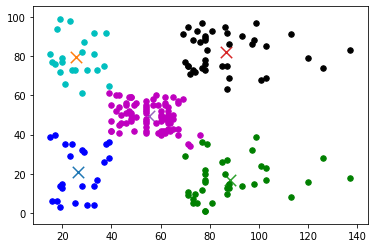

In [44]:
clusters = ["b", "c", "g", "k", "m",'m']

for centroid in kmc.centroids:
    plt.scatter(kmc.centroids[centroid][0], kmc.centroids[centroid][1], s = 130, marker = "x")

for classification in kmc.groups:
    cluster = clusters[classification]
    for features in kmc.groups[classification]:
        plt.scatter(features[0], features[1], color = cluster,s = 30)

# Applying KMC on prof dataset online retail


In [9]:
df = pd.read_excel('Online Retail.xlsx')
# df=pd.read_csv("top50.csv",encoding='ISO-8859-1')

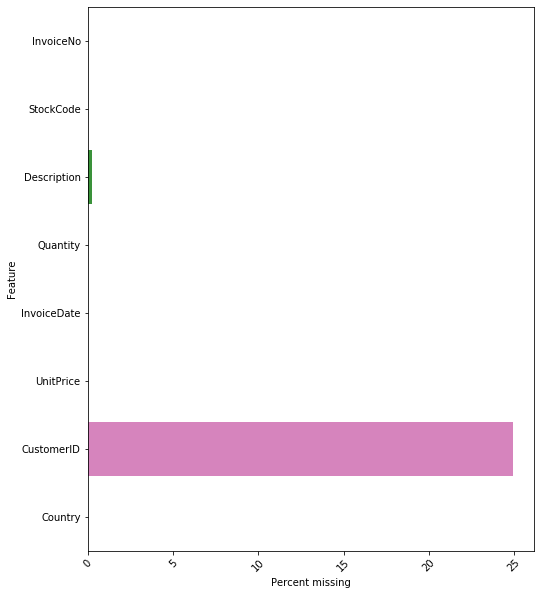

In [10]:
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [11]:
df1 = df.dropna(subset = ["CustomerID","Description"])
df1.shape

(406829, 8)

In [199]:
df2 = df1.drop_duplicates()



In [200]:
df3 = df2 [['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [201]:

df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']


/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
current_date = dt.datetime(2011,12,10)
current_date

datetime.datetime(2011, 12, 10, 0, 0)

In [203]:
df4 = df3.groupby(['CustomerID']).agg({ 'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})
df4.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)


In [204]:
df5 = df4[(df4 > 0).all(1)]
print(df5.shape)

(4284, 3)


In [177]:

df6 = (np.log(df5 + 1))


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(df6)
df7 = pd.DataFrame(scaler.transform(df6))
df7.columns = df6.columns



In [179]:
X = df7.values

In [166]:
kmc = cluster_K_means()
kmc.fit(X, 3)

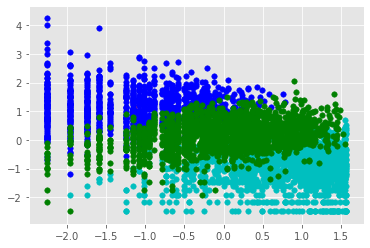

In [167]:
clusters = ["b", "c", "g"]

for centroid in kmc.centroids:
    plt.scatter(kmc.centroids[centroid][0], kmc.centroids[centroid][1], s = 130, marker = "x")

for classification in kmc.groups:
    cluster = clusters[classification]
    for features in kmc.groups[classification]:
        plt.scatter(features[0], features[1], color = cluster,s = 30)